# Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, we will  build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [Data Wrangling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4) 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   [**Exploratory Data Analysis**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

Load the necessary packages as we did in step 2 and print out the current working directory just to confirm we are in the correct project directory.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(os.getcwd())
print(os.listdir())

/Users/jb/Development/courses/springboard/ds/Assignments/6 Applying the Data Science Method/big-mountain-resort
['Notebook_Step4.ipynb', 'Notebook_Step6.ipynb', 'Notebook_Step2.ipynb', '.DS_Store', 'LICENSE', 'Notebook_Step5.ipynb', 'models', 'Notebook_Step3.ipynb', 'README.md', '.gitignore', 'figures', '.ipynb_checkpoints', '.git', 'data']


Load the csv file created in step 2,nsaved inside your data subfolder. Print the first five rows

In [2]:
df = pd.read_csv('data/step2_output.csv')
df.head(5)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

Prints out the summary stats table transposed to fit on the screen

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Plots histograms for all numeric features with the bins size to 25.

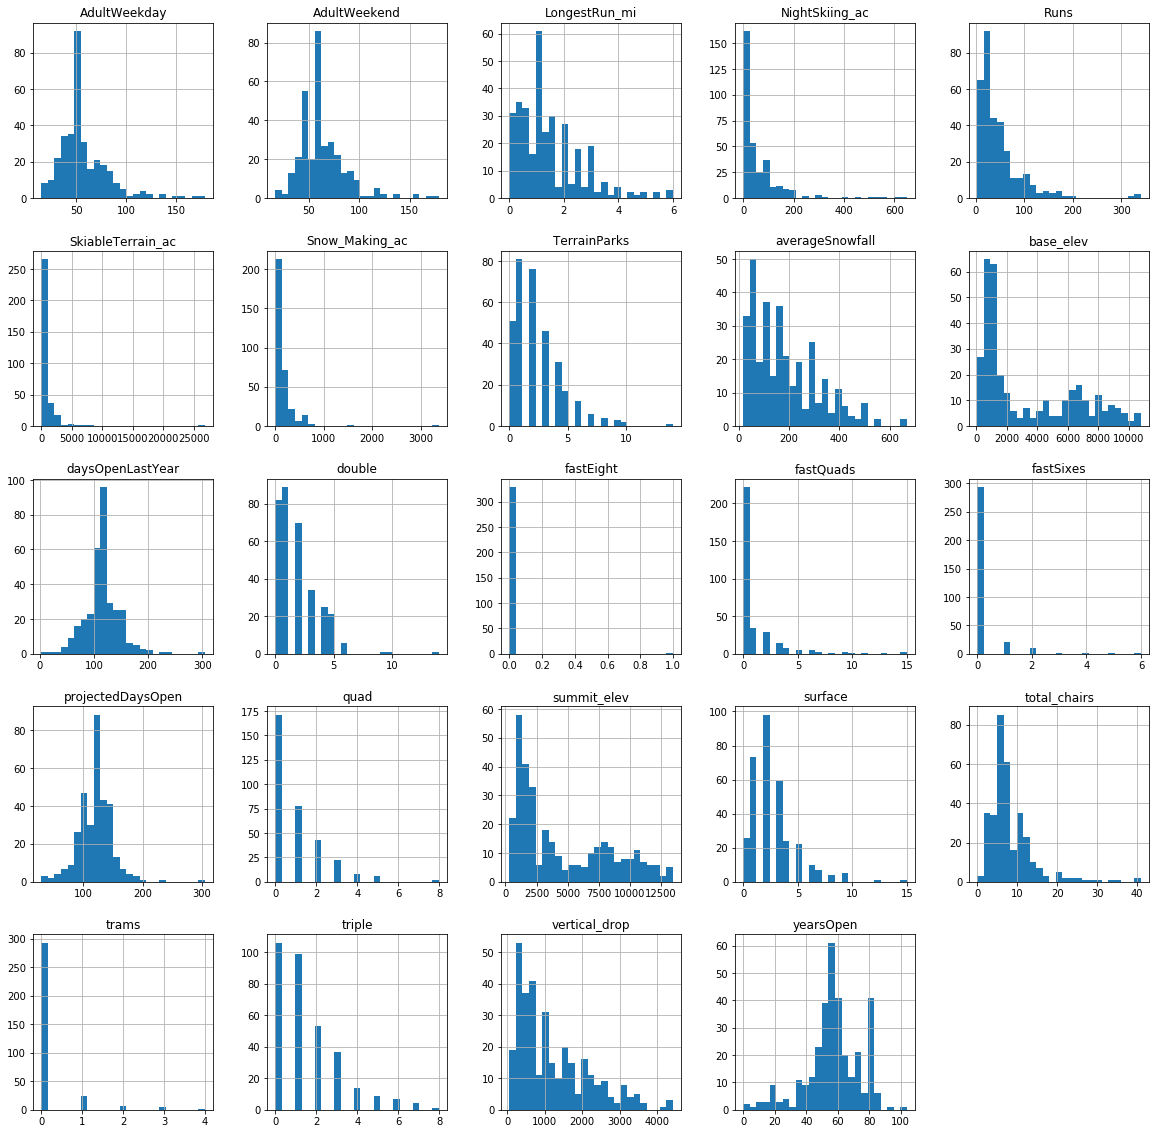

In [4]:
_ = df.hist(bins=25, figsize =(20,20))

There are no features that look like duplicate feeatres but a few features like they could be highly correlated. The features 'AdultWeekday' and 'AdultWeekend' look like the could be correlated.
The features 'daysOpenLastYear' and 'projectedDaysOpen' also look like they could be highly correlated. Lastly, the features 'vertical_drop', 'summit_elev', and 'base_elev' look like they might be highly correlated.

Creates a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable.

**<font color='teal'>State Levels Plot</font>**

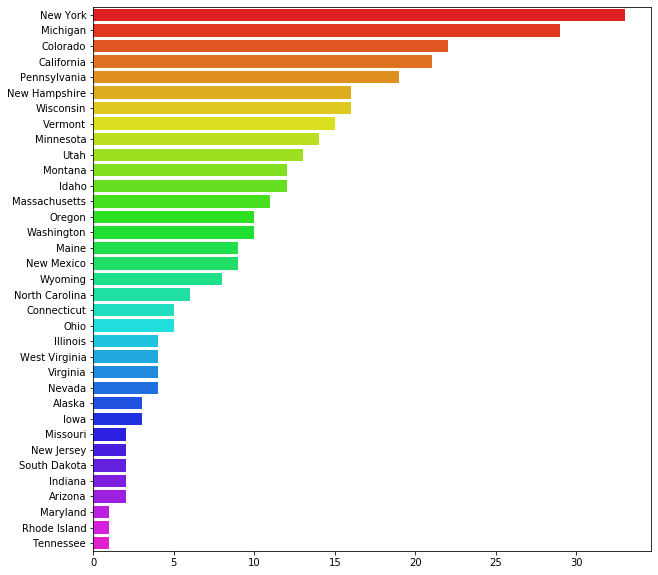

In [5]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.state.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.state)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="gist_rainbow")

**<font color='teal'>Region Levels Plot</font>**

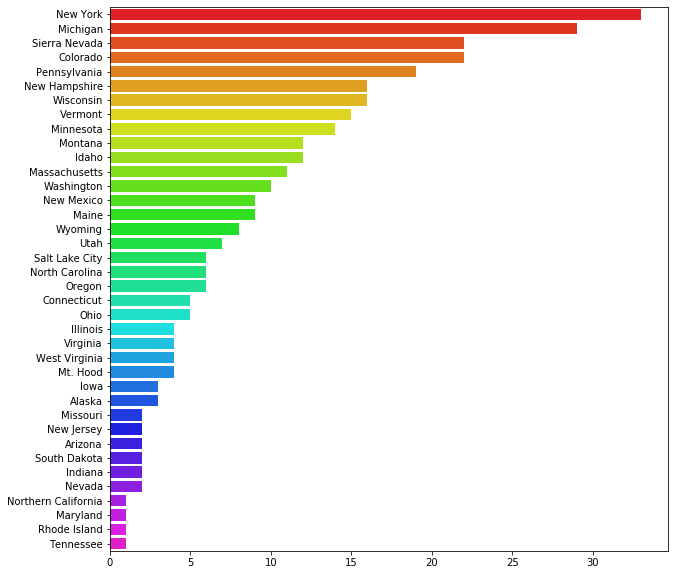

In [6]:
# Now do the same for regions!
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Region.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Region)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="gist_rainbow")

By reviewing the State and Regions counts plots we should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.

Drops the `Region` column.

In [7]:
df.drop(['Region'], axis=1, inplace=True)
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Anamolies & Outliers - Review boxplots

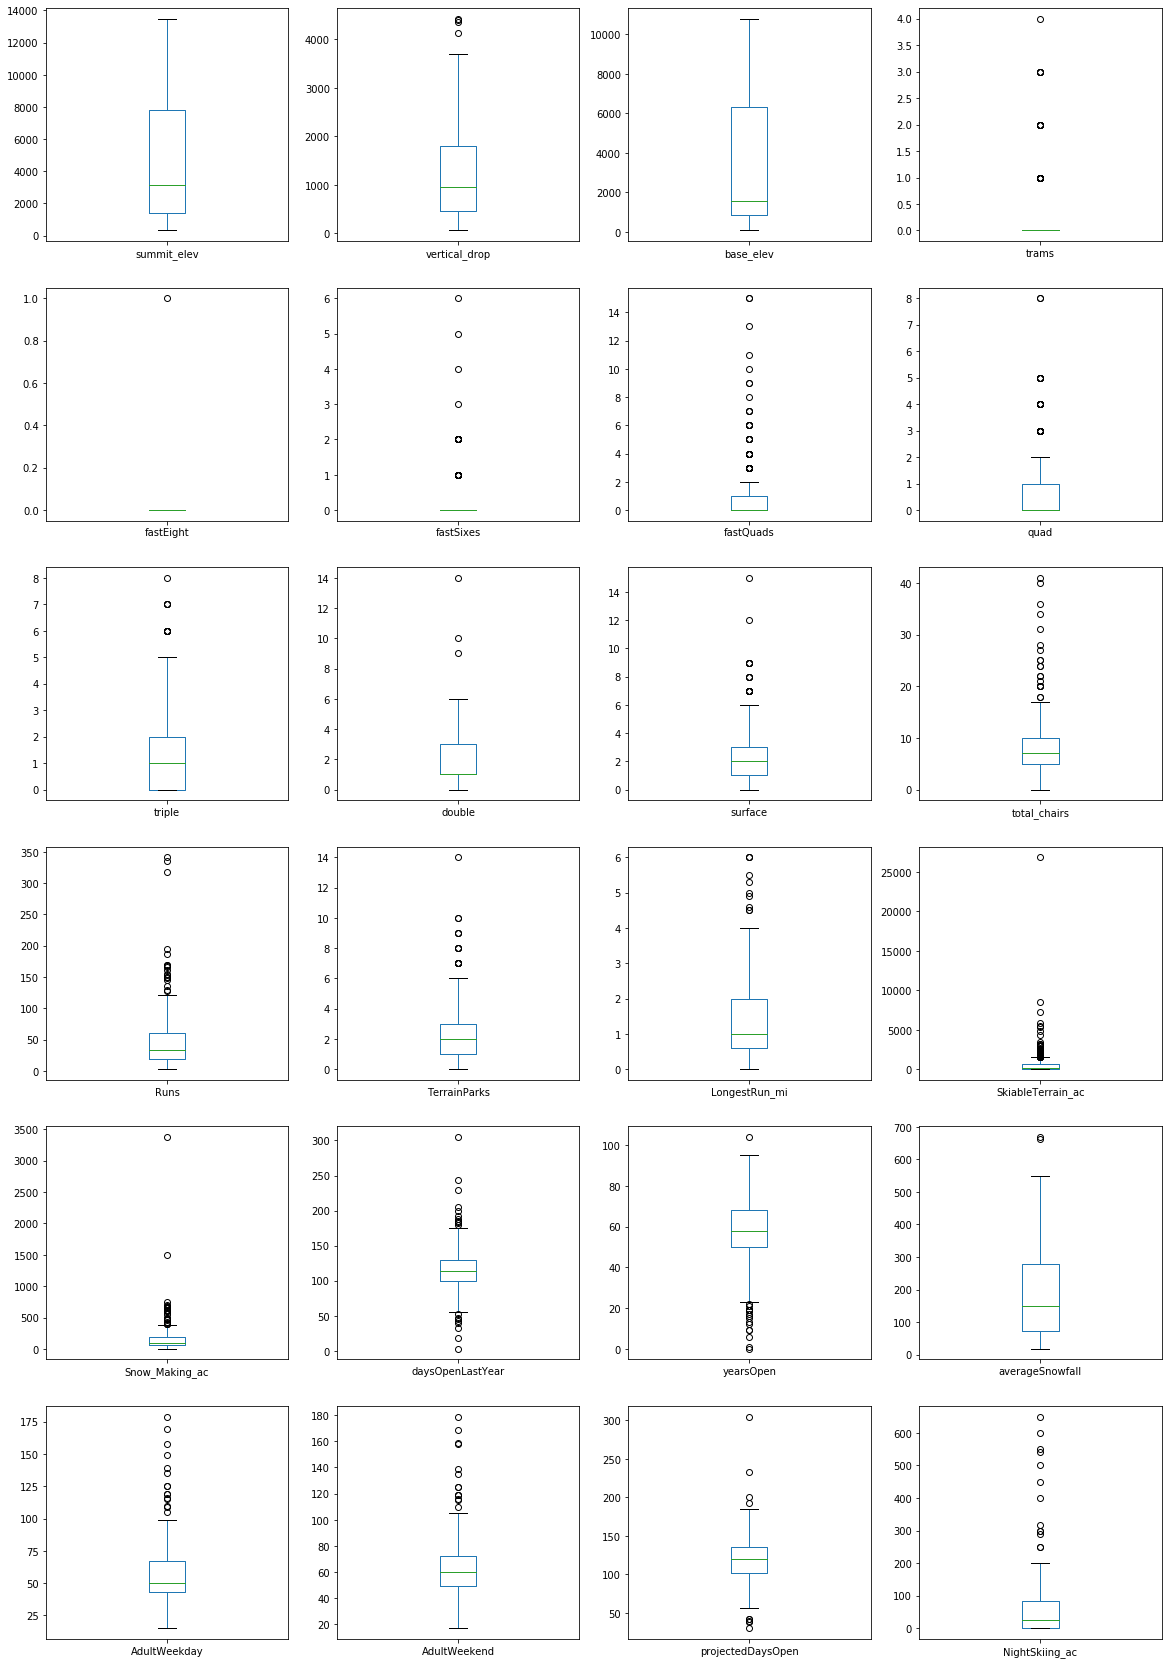

In [8]:
boxplot = df.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20,30))

We need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help us interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors.

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed

Recall that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

In [9]:
df[df['Name'].str.contains('Big')]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
74,Big Squaw Mountain Ski Resort,Maine,3200,660,1750,0,0.0,0,0,0,...,0.8,200.0,100.0,67.0,6.0,150.0,30.0,30.0,58.0,0.0
97,Big Powderhorn Mountain,Michigan,1800,600,1200,0,0.0,0,0,0,...,1.0,253.0,228.0,100.0,55.0,214.0,69.0,69.0,108.0,0.0
99,Big Snow Resort - Blackjack,Michigan,850,465,385,0,0.0,0,0,0,...,1.0,170.0,86.0,95.0,42.0,210.0,49.0,65.0,115.0,0.0
105,Big Snow Resort - Indianhead Mountain,Michigan,1935,638,1297,0,0.0,0,0,1,...,1.0,240.0,150.0,120.0,60.0,204.0,49.0,49.0,120.0,0.0
140,Big Sky Resort,Montana,11166,4350,7500,1,1.0,2,5,3,...,6.0,5800.0,400.0,144.0,46.0,400.0,50.0,60.0,144.0,0.0
238,Ski Big Bear,Pennsylvania,1250,650,600,0,0.0,0,0,0,...,1.5,26.0,26.0,75.0,43.0,69.0,50.0,62.0,75.0,26.0
239,Big Boulder,Pennsylvania,2175,600,1700,0,0.0,0,0,0,...,1.0,55.0,55.0,76.0,72.0,50.0,50.0,65.0,95.0,55.0


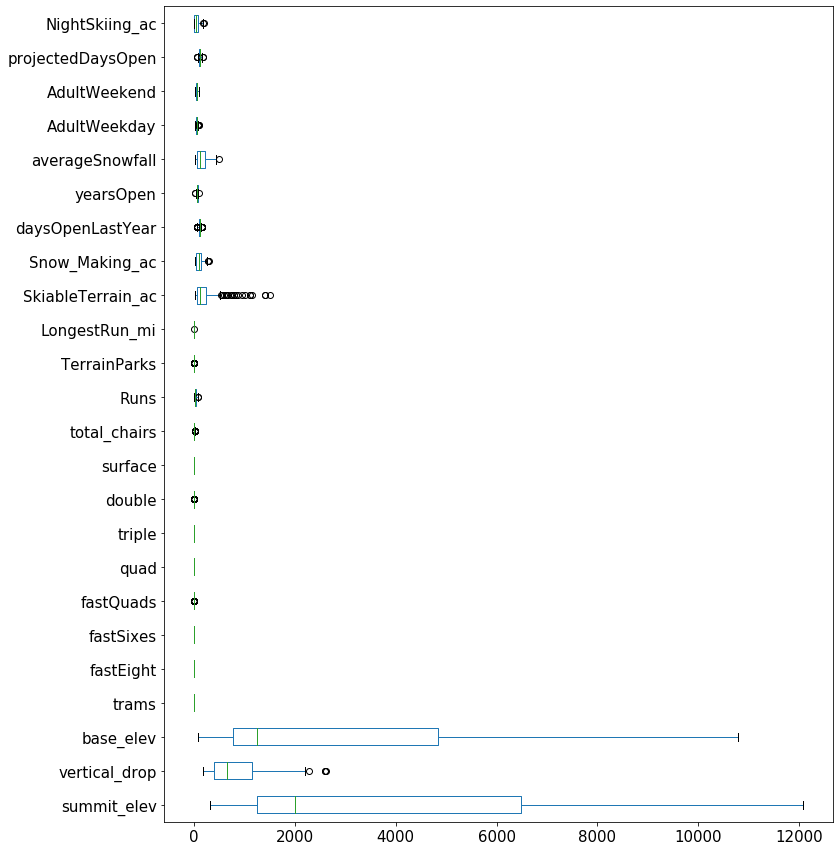

In [10]:
df_shape_with_outliners = df.shape


# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
outlier_range = 1.5 # started at 1.5 but felt that  removal of outlines was not required here.
lower = (df < (Q1 - outlier_range * IQR))
upper = (df> (Q3 + outlier_range * IQR))
dfno = df[~(lower | upper).any(axis=1)]

# We now want to make a boxplot of this new dataframe dfno. 
_ = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [11]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 
print(df_shape_with_outliners)
print(dfno.shape)

(330, 26)
(171, 26)


In [12]:
# Let's ensure Big Mountain Resort is retained in the data set
dfno[dfno['Name'].str.contains('Whitefish')]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow_Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [13]:
# wf_mtn = df[df['Name'] == 'Whitefish Mountain Resort']
# wf_mtn

In [14]:
# dfno = dfno.append(wf_mtn).reset_index(drop=True)

In [15]:
# dfno[dfno['Name'].str.contains('Whitefish Mountain')]

In [16]:
print(dfno.shape)


(171, 26)


In [17]:
# df = dfno.copy()

In [18]:
# drop_silver = df.loc[df.summit_elev == df.summit_elev.max().max()]
# drop_silver

In [19]:
# df.drop(39, inplace=True)
# df.loc[df.summit_elev == df.summit_elev.max().max()]

There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on the problem, the methodology for solving that problem, and the nature of the data. 

Each method will /have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

Because of the extreme lost of data with outlier remove, almost half the data. We decide to not use the dataframe with outlier removers.

There are many possible response variables you could have identified in Step 1 of the project. We will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Whitefish Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

Review the `AdultWeekday`,`AdultWeekend` response variable distributions.

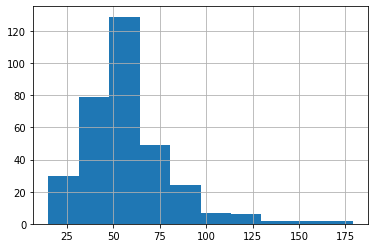

In [20]:
# Make a histogram of the 'AdultWeekday' column of the dfno dataframe. 
# You'll want to call hist() on that column 
df.AdultWeekday.hist()

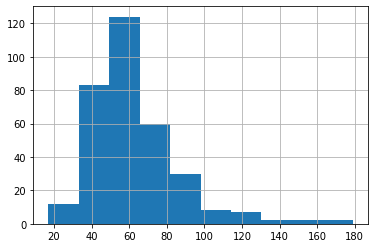

In [21]:
# Do the same but with the AdultWeekend column 
df.AdultWeekend.hist()

Review the `daysOpenLastYear`,`projectedDaysOpen` response variable distributions.

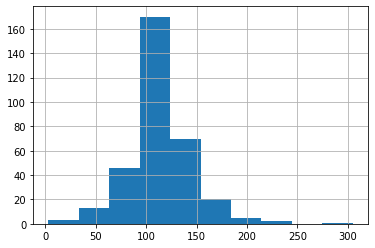

In [22]:
# Do the same as above! 
df.daysOpenLastYear.hist()

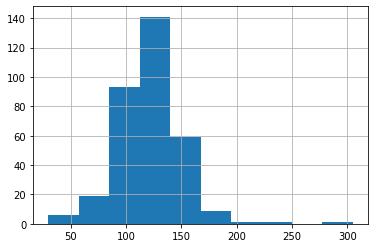

In [23]:
df.projectedDaysOpen.hist()

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

Created pairplots or what is commonly referred to as biplots.

Pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

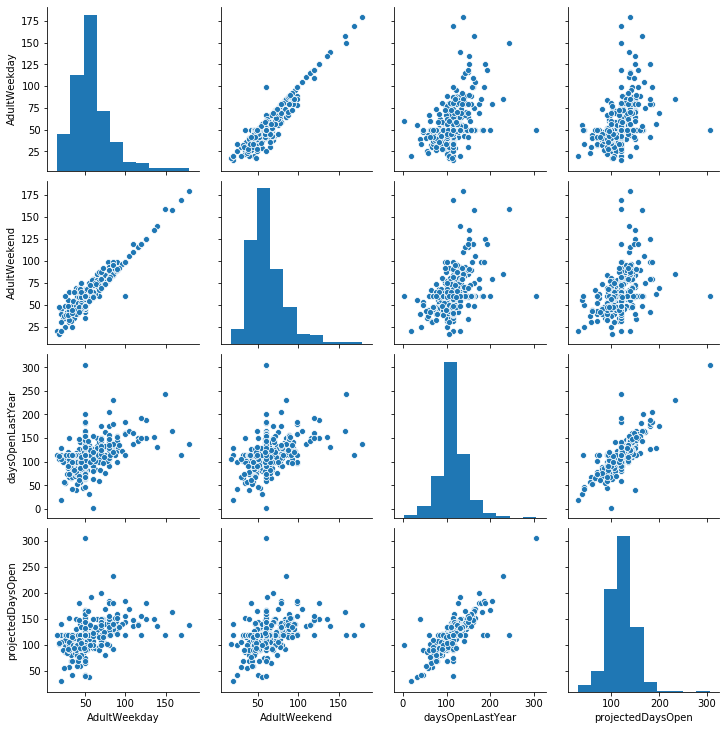

In [24]:
g = sns.pairplot(df, vars=['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear', 'projectedDaysOpen'])

# Identification and creation of features

Created a Pearson correlation heatmap

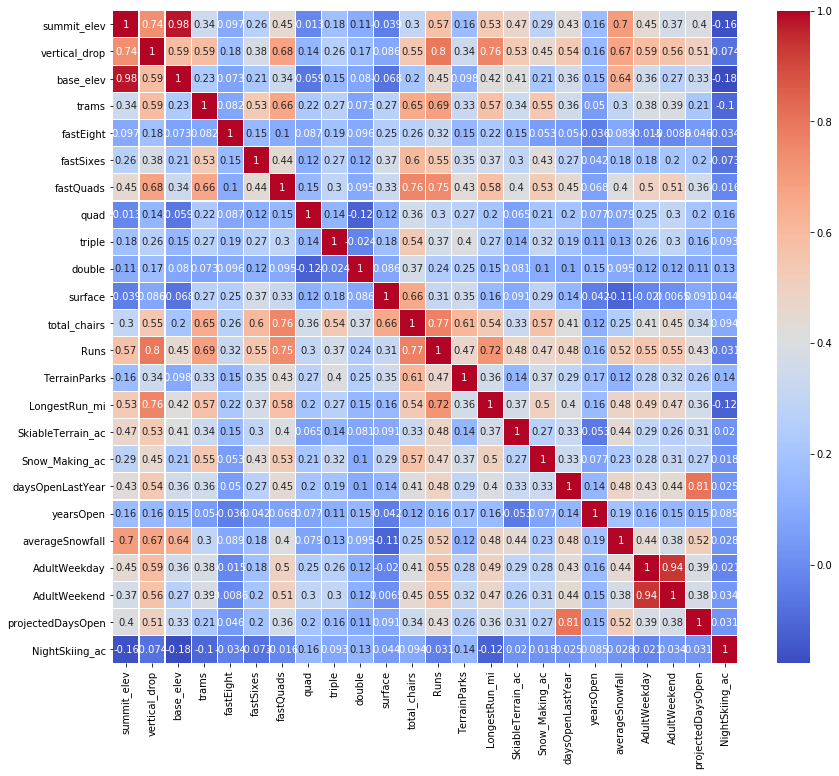

In [25]:
#Calculate the correlation coefficients
corr = df.corr(method = 'pearson')

plt.figure(figsize=(14,12))
sns.heatmap(corr ,linewidths=.1,cmap="coolwarm", annot=True)


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

We use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [26]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [27]:
# Let's see those features! 
print('Features selected to drop include:', to_drop)

Features selected to drop include: ['base_elev']


In [28]:
print('Reduced dataframe size: ', df.drop(df[to_drop], axis=1).shape)

Reduced dataframe size:  (330, 25)


In [29]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
df.drop(to_drop, axis=1, inplace=True)

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

The next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 



In [30]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

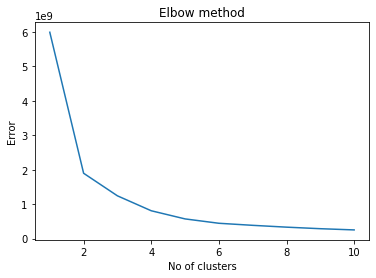

In [31]:
Error =[]
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i).fit(x)
   kmeans.fit(x)
   Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

Fit the kmeans algorithm with the k parameter set to three and plot the results.

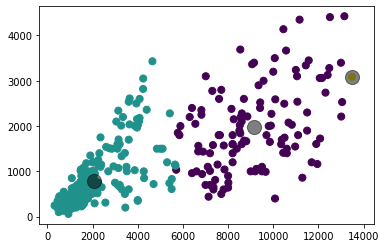

In [32]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Add the clusters to the dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.

In [33]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
df['clusters'] = y_kmeans3

In [34]:
# Write your dataframe to csv
df.to_csv('data/step3_output.csv', index=False)